In [1]:
import numpy as np

import torch
import torch_geometric
from torch_geometric.utils import to_networkx

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib import pyplot, patches

In [2]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

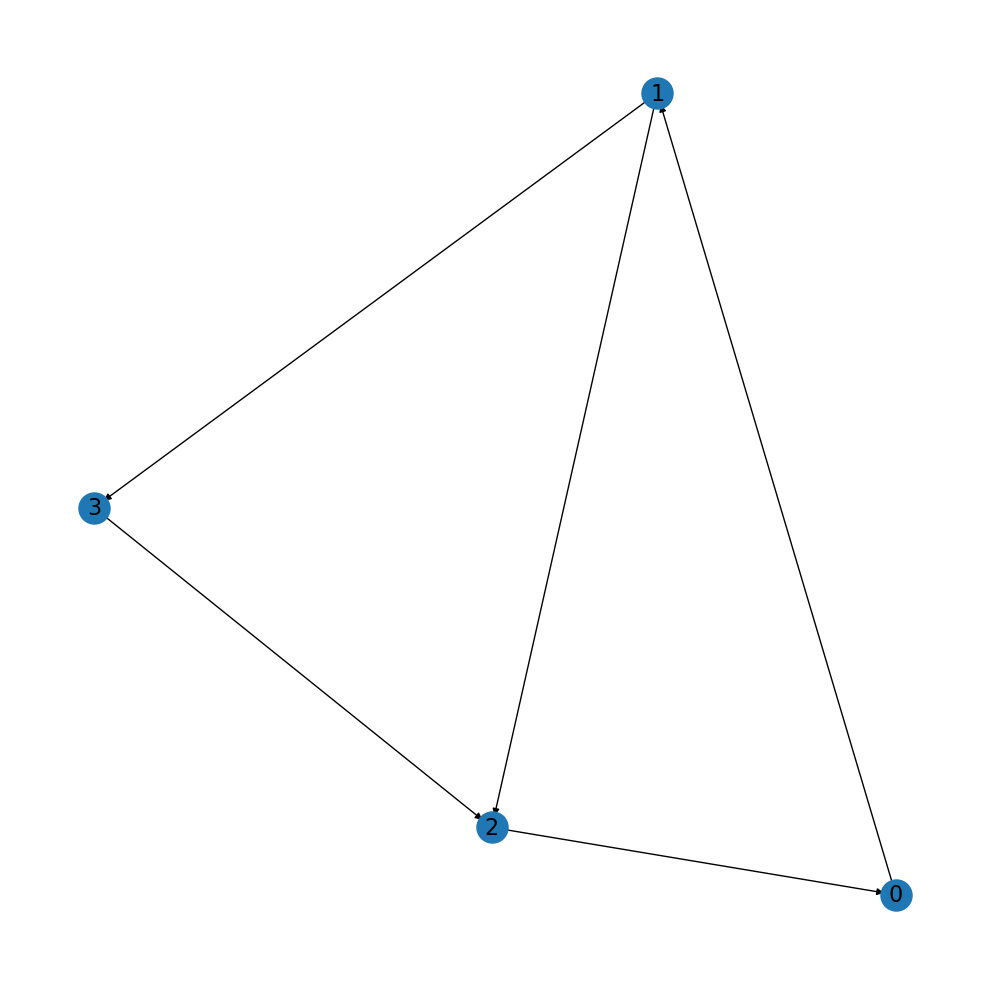

In [5]:
def visualize_graph(adjacency_matrix):
    # Convert PyTorch tensor to numpy array
    adj_matrix = adjacency_matrix.cpu().numpy()

    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    # Set up the plot
    plt.figure(figsize=(10, 10))
    
    # Generate a layout for the nodes
    pos = nx.spring_layout(G)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)
    
    # Draw the edges
    nx.draw_networkx_edges(G, pos, arrows=True)
    
    # Add labels to the nodes
    labels = {i: str(i) for i in range(len(G))}
    nx.draw_networkx_labels(G, pos, labels, font_size=16)
    
    # Show the plot
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
# Create a sample adjacency matrix as a PyTorch tensor
adj_matrix = torch.tensor([
    [0, 2, 0, 0],
    [0, 0, 1, 1],
    [1, 0, 0, 0],
    [0, 0, 3, 0]
], dtype=torch.float32)

visualize_graph(adj_matrix)

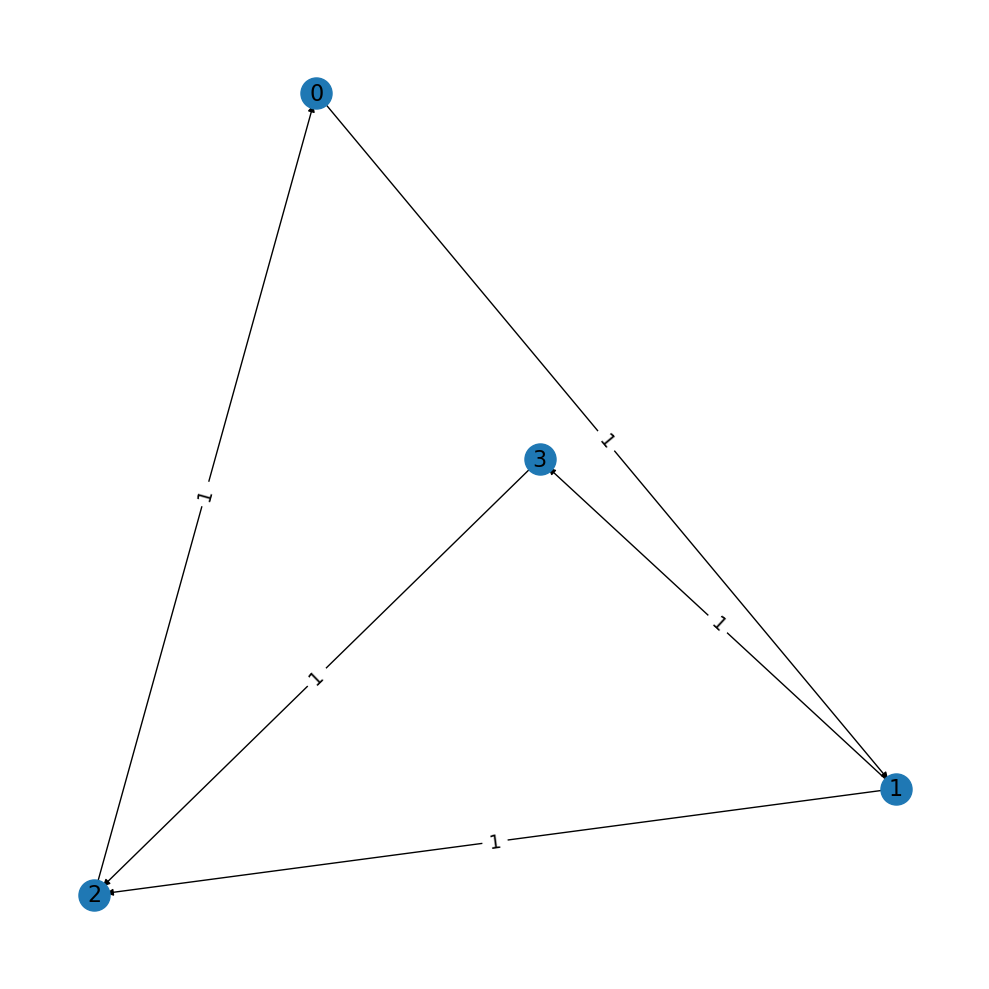

In [17]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

edge_list = ["NONE", "in front of", "behind", "left of", "right of", "on", "adjacent to", "intersects with"]

def visualize_graph(adjacency_matrix):
    # Convert PyTorch tensor to numpy array
    adj_matrix = adjacency_matrix.cpu().numpy()

    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    # Remove isolated nodes (nodes with no connections)
    G.remove_nodes_from(list(nx.isolates(G)))

    # If the graph is empty after removing isolated nodes, return
    if len(G) == 0:
        print("No connected nodes to display.")
        return

    # Set up the plot
    plt.figure(figsize=(10, 10))
    
    # Generate a layout for the nodes
    pos = nx.spring_layout(G)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)
    
    # Draw the edges
    nx.draw_networkx_edges(G, pos, arrows=True)
    
    # Add labels to the nodes
    labels = {node: str(node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=16)

    #edge_labels = {(u, v): edge_list[ min(adj_matrix[u][v], len(edge_list)-1) ] for u, v in G.edges()}
    edge_labels = {(u, v): adj_matrix[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)

    
    # Show the plot
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
# Create a sample adjacency matrix as a PyTorch tensor
adj_matrix = torch.tensor([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]  # This node is isolated
], dtype=torch.int)

visualize_graph(adj_matrix)


In [32]:
traj = 0
frame = 0

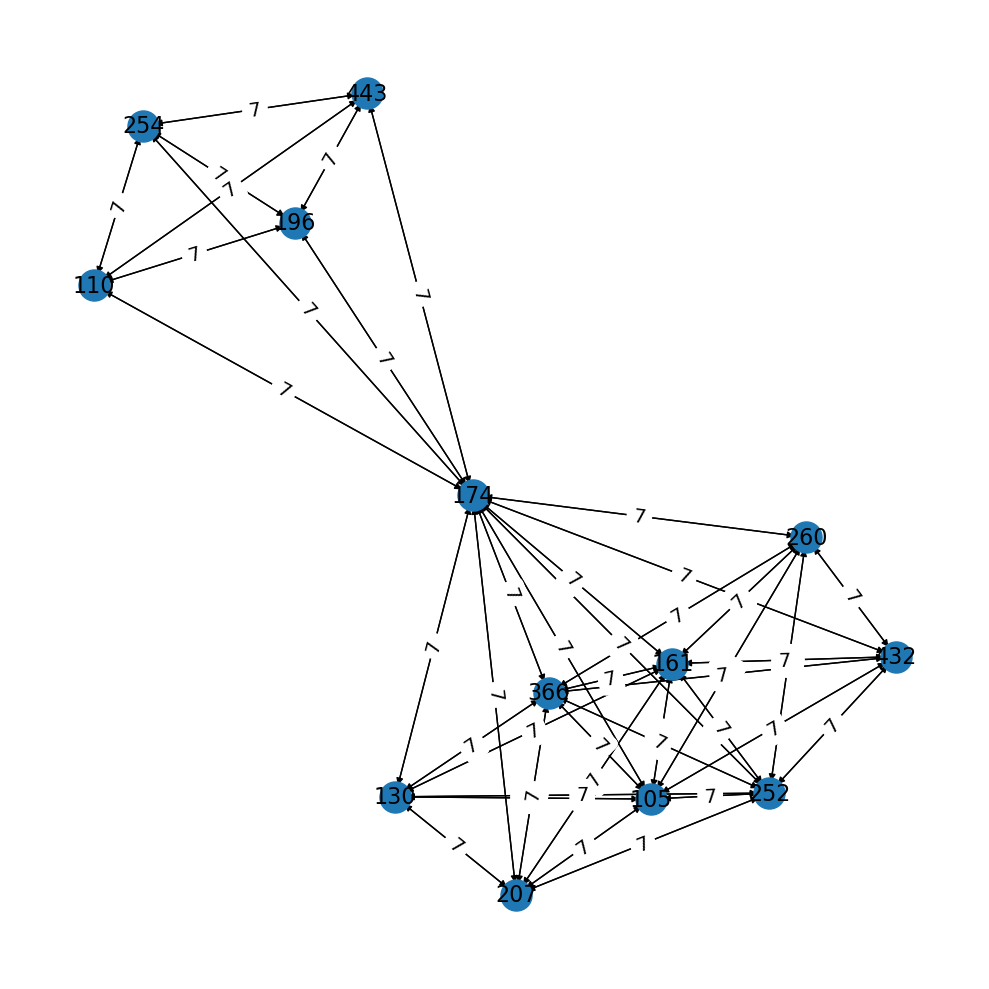

In [33]:
sg = torch.load('./data/scene_graphs/%d.pt' % traj).int()
visualize_graph(sg[frame])

In [39]:
import pickle
import json

with open('./data/objects/%d.pkl' % traj, 'rb') as f:
    objects = pickle.load(f)

with open('./data/metadata/%d.json' % traj, 'rb') as f:
    metadata = json.load(f)

token = metadata['object_tokens'][4]
objects[frame][token]

{'type': 'instance',
 'category': 'ego',
 'pose': (411.2494814111038, 1180.7432096568386, -1.9234410099058394)}

In [37]:
#objects[frame]['ego']
metadata['object_tokens'].index('ego')

4